<a href="https://colab.research.google.com/github/Gowr93/Project_Repository_GowriCS/blob/main/Empowering_Financial_Security.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Empowering Financial Security

Detecting Fraudulent Transactions using Advanced Machine Learning Techniques and Predictive Analytics

Developing a machine learning model to  detect potentially fraudulent transactions based on the provided features

## Aim:
  To build a classification model to classify transactions either
  i> Legitimate Transactions
  ii> Fraudulent Transactions

In [5]:
# Importing the necessary libraries

import os # interacts with OS
import numpy as np # For numerical computations
import pandas as pd # For Data manipulation,analysis
import matplotlib.pyplot as plt # For Data visualization
#display plots directly within the output cell
%matplotlib inline
import seaborn as sns # Statistical data visualization
sns.set()
import warnings # used to suppress warnings to keep output clean
warnings.filterwarnings("ignore") # ignoring warnings to the user


In [6]:
# Data Loading
Fraud_dect = pd.read_csv('/content/payment_fraud.csv')

In [7]:
# Data Volume
Fraud_dect.shape

(39221, 8)

In [8]:
print("Number of Columns: {}".format(Fraud_dect.shape[1]))
print("Number of Rows: {}".format(Fraud_dect.shape[0]))

Number of Columns: 8
Number of Rows: 39221


In [9]:
# Displaying the first 5 Columns from the dataset
Fraud_dect.head()

,accountAgeDays,numItems,localTime,paymentMethod,paymentMethodAgeDays,Category,isWeekend,label
0,29,1,4.745402,paypal,28.204861,shopping,0.0,0
1,725,1,4.742303,storecredit,0.000000,electronics,0.0,0
2,845,1,4.921318,creditcard,0.000000,food,1.0,0
3,503,1,4.886641,creditcard,0.000000,electronics,1.0,0
4,2000,1,5.040929,creditcard,0.000000,shopping,0.0,0


In [10]:
# Review the Structure of dataset
Fraud_dect.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39221 entries, 0 to 39220
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   accountAgeDays        39221 non-null  int64  
 1   numItems              39221 non-null  int64  
 2   localTime             39221 non-null  float64
 3   paymentMethod         39221 non-null  object 
 4   paymentMethodAgeDays  39221 non-null  float64
 5   Category              39126 non-null  object 
 6   isWeekend             38661 non-null  float64
 7   label                 39221 non-null  int64  
dtypes: float64(3), int64(3), object(2)
memory usage: 2.4+ MB


From the Dataset:

---->
we notice column name ['Category' , 'isWeekend'] has missing data

---->
Two Categorical data column name ['Category' , 'paymentMethod']


In [11]:
# Displaying Column names
Fraud_dect.columns

Index(['accountAgeDays', 'numItems', 'localTime', 'paymentMethod',
       'paymentMethodAgeDays', 'Category', 'isWeekend', 'label'],
      dtype='object')

In [12]:
# Summary of Descriptive Statistics
Fraud_dect.describe()

,accountAgeDays,numItems,localTime,paymentMethodAgeDays,isWeekend,label
count,39221.000000,39221.000000,39221.000000,39221.000000,38661.000000,39221.000000
mean,857.563984,1.084751,4.748232,122.641326,0.499547,0.014278
std,804.788212,0.566899,0.389360,283.569177,0.500006,0.118636
min,1.000000,1.000000,0.421214,0.000000,0.000000,0.000000
25%,72.000000,1.000000,4.742303,0.000000,0.000000,0.000000
50%,603.000000,1.000000,4.886641,0.012500,0.000000,0.000000
75%,1804.000000,1.000000,4.962055,87.510417,1.000000,0.000000
max,2000.000000,29.000000,5.040929,1999.580556,1.000000,1.000000


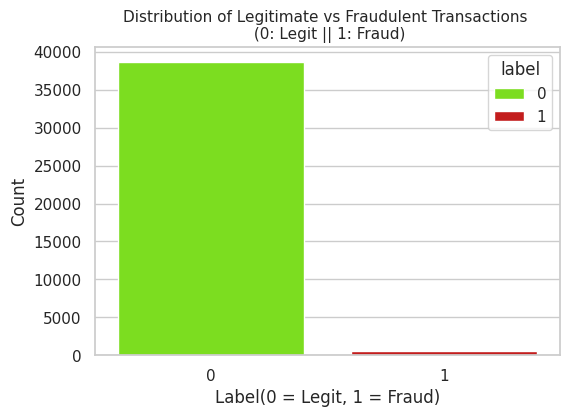

In [13]:
# Visualise the Distribution of target variable 'label'
sns.set(style="whitegrid")
plt.figure(figsize=(6,4))
colors = ["#7CFC00","#DF0101"]
sns.countplot(x='label', data = Fraud_dect, palette=colors, hue='label')

# Adding labels and title
plt.title('Distribution of Legitimate vs Fraudulent Transactions \n (0: Legit || 1: Fraud)', fontsize=11)
plt.xlabel('Label(0 = Legit, 1 = Fraud)')
plt.ylabel('Count')

# Show plot
plt.show()

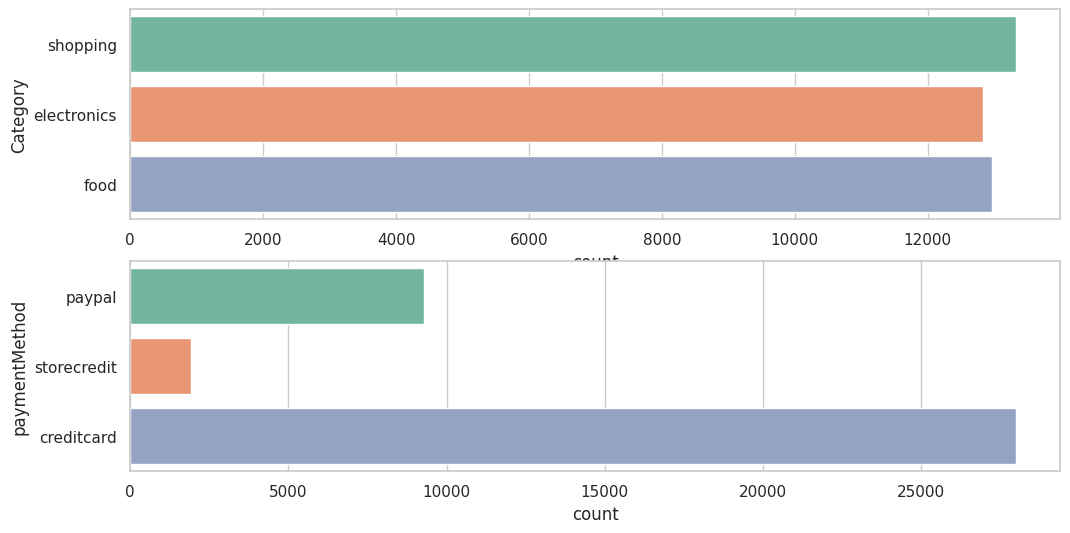

In [14]:
# Visualize all Categorical Columns in  one dataFrame

cat_features = Fraud_dect[['Category' , 'paymentMethod']]

# set up 2 x 2 frame count plot with figsize 12 * 6
fig , ax = plt.subplots(2,figsize =(12,6))

for i , subplots in zip(cat_features, ax.flatten()):
  sns.countplot(cat_features[i], ax = subplots, palette='Set2')
plt.show()



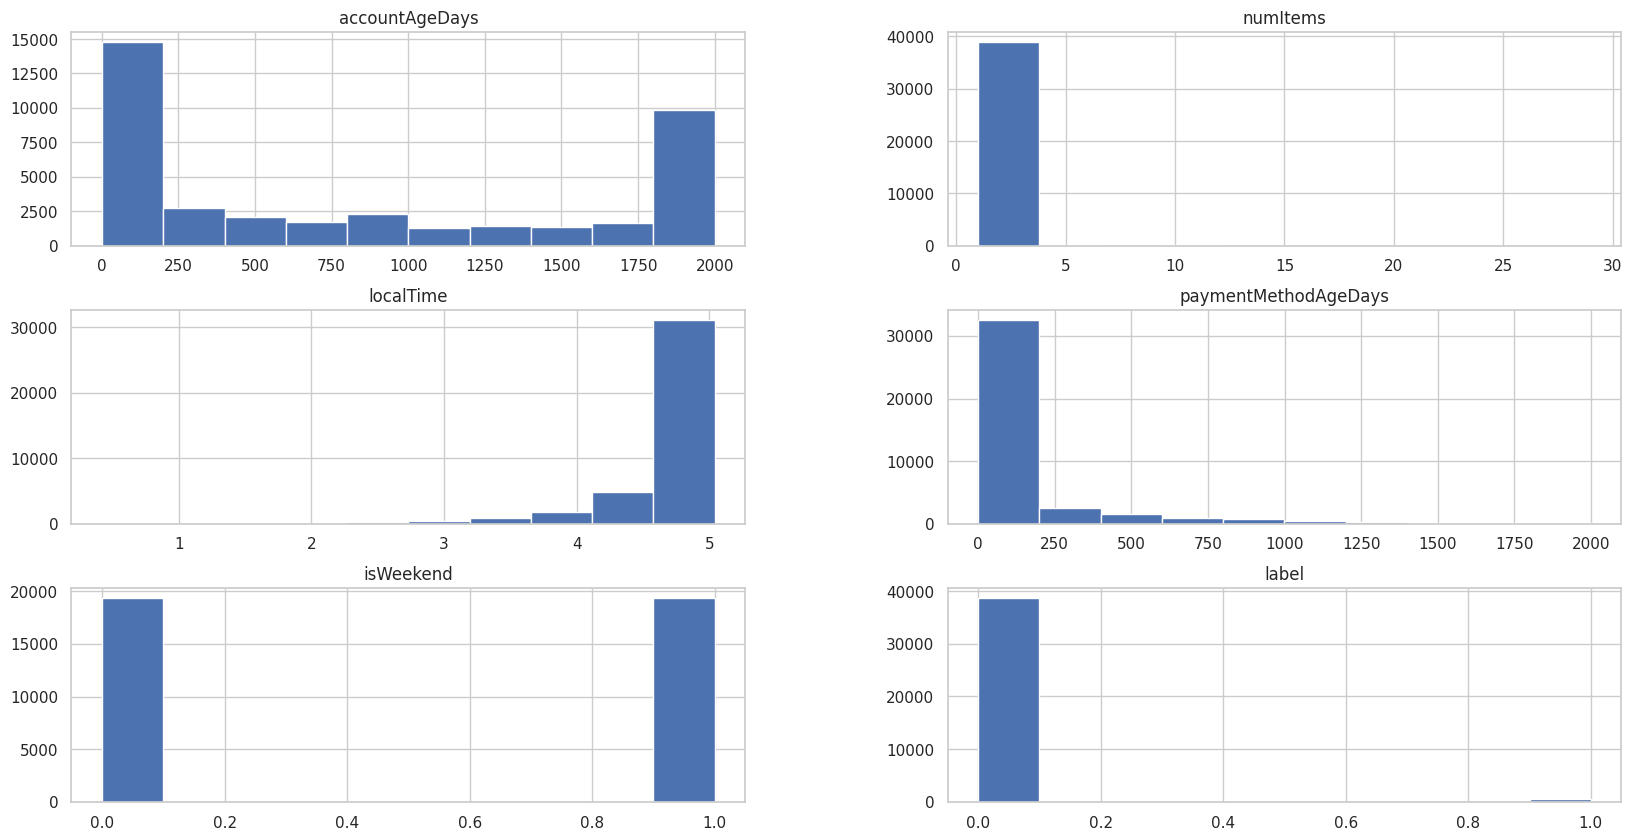

In [15]:
# Visualizing the numerical data using histogram
sns.set(style="whitegrid")
Fraud_dect.hist(figsize = (20,10))
plt.show()


In [16]:
# Visualize Class Imbalance
Fraud_dect['label'].value_counts()

# Fraud is rear(1), needs to be Resampled

,count
label,
0,38661
1,560


## Handling Missing data

In [17]:
# Checking the Missing data
Fraud_dect.isnull().sum()

,0
accountAgeDays,0
numItems,0
localTime,0
paymentMethod,0
paymentMethodAgeDays,0
Category,95
isWeekend,560
label,0


In [18]:
## Checking the Missing data in percentage
Fraud_dect.isnull().sum()/len(Fraud_dect)*100

,0
accountAgeDays,0.000000
numItems,0.000000
localTime,0.000000
paymentMethod,0.000000
paymentMethodAgeDays,0.000000
Category,0.242217
isWeekend,1.427807
label,0.000000


In [19]:
# Since ['Category'] is object , we use Categorical Transformation
# Label Encoder

from sklearn.preprocessing import LabelEncoder

# initialize the label encoder
label_encoder = LabelEncoder()

# Select all columns with object type
cat_cols = Fraud_dect.select_dtypes(include = 'object').columns

# Iterate through each column and apply label encoding for categorical columns
for col in cat_cols:
  Fraud_dect[col] = label_encoder.fit_transform(Fraud_dect[col].astype(str))



In [20]:
# Cross Checking
Fraud_dect.isnull().sum()

,0
accountAgeDays,0
numItems,0
localTime,0
paymentMethod,0
paymentMethodAgeDays,0
Category,0
isWeekend,560
label,0


In [21]:
# Since ['isWeekend'] is numerical datatype
# We use Imputation Method using Mode concept since its binary values as output
# Finding Most Frequent Used
Fraud_dect['isWeekend'].mode()

,isWeekend
0,0.0


In [22]:
# Imputation
Fraud_dect['isWeekend'].fillna(Fraud_dect['isWeekend'].mode()[0], inplace = True)

In [23]:
# Cross Checking
Fraud_dect.isnull().sum()

,0
accountAgeDays,0
numItems,0
localTime,0
paymentMethod,0
paymentMethodAgeDays,0
Category,0
isWeekend,0
label,0


## Handling Duplicates

In [24]:
# Checking for duplicate rows
Fraud_dect.duplicated().sum()

np.int64(3033)

In [25]:
# Displaying duplicated rows in the dataset
Fraud_dect[Fraud_dect.duplicated()].head()


,accountAgeDays,numItems,localTime,paymentMethod,paymentMethodAgeDays,Category,isWeekend,label
492,2000,1,5.040929,0,0.0,0,1.0,0
682,2000,1,4.886641,0,0.0,1,0.0,0
802,2000,1,4.742303,1,0.0,3,0.0,0
838,2000,1,4.962055,0,0.0,3,0.0,0
881,2000,1,4.836982,0,0.0,3,1.0,0


In [26]:
# Dropping the duplicate Values
Fraud_dect.drop_duplicates(keep='first',inplace=True)

In [27]:
print("Number of Columns: {}".format(Fraud_dect.shape[1]))
print("Number of Rows: {}".format(Fraud_dect.shape[0]))

Number of Columns: 8
Number of Rows: 36188


## Feature Scaling

In [28]:
Fraud_dect.head()

,accountAgeDays,numItems,localTime,paymentMethod,paymentMethodAgeDays,Category,isWeekend,label
0,29,1,4.745402,1,28.204861,3,0.0,0
1,725,1,4.742303,2,0.000000,0,0.0,0
2,845,1,4.921318,0,0.000000,1,1.0,0
3,503,1,4.886641,0,0.000000,0,1.0,0
4,2000,1,5.040929,0,0.000000,3,0.0,0


In [29]:
# Standardizing ['accountAgeDays','paymentMethodAgeDays']
from sklearn.preprocessing import StandardScaler

# Initializing the StandardScaler
scaler = StandardScaler()

# Columns to be scaled
scaler_columns = [ 'accountAgeDays','localTime','paymentMethodAgeDays']
Fraud_dect[scaler_columns] = scaler.fit_transform(Fraud_dect[scaler_columns])


In [61]:
Fraud_dect.tail(50)

,accountAgeDays,numItems,localTime,paymentMethod,paymentMethodAgeDays,Category,isWeekend,label
39165,0.939448,1,-1.984176,1,-0.453682,3,0.0,0
39166,0.974091,1,0.340003,0,-0.419742,3,0.0,0
39168,0.458301,1,0.364877,0,-0.451013,3,0.0,0
39170,-0.990273,1,0.008937,0,-0.453682,3,1.0,0
39171,0.060553,1,0.008937,0,0.687495,3,0.0,0
39172,1.229420,1,0.016276,0,-0.453682,3,0.0,0
39173,-1.035180,1,0.737807,0,-0.453680,3,0.0,0
39174,0.158065,1,0.340003,0,2.644267,3,0.0,0
39175,-0.992839,1,0.386605,2,-0.443811,3,1.0,0
39176,1.521957,1,0.016276,1,4.331665,3,1.0,0


Splitting the Targe Variable [Label] from the rest of the rest of the training data

In [31]:
# All columns from the dataset except [label]
X = Fraud_dect.drop('label', axis = 1)
# Target Variable
y = Fraud_dect['label']

In [32]:
# Calculating the correlation matrix
corr_matrix = Fraud_dect.corr()
corr_matrix

,accountAgeDays,numItems,localTime,paymentMethod,paymentMethodAgeDays,Category,isWeekend,label
accountAgeDays,1.000000,-0.031469,-0.027682,0.000485,0.383914,0.007576,0.018643,-0.109695
numItems,-0.031469,1.000000,-0.040995,-0.006201,0.026921,-0.002889,0.000479,0.046335
localTime,-0.027682,-0.040995,1.000000,0.001603,-0.026736,-0.002963,0.007677,-0.054416
paymentMethod,0.000485,-0.006201,0.001603,1.000000,-0.011515,0.004848,0.002433,0.005117
paymentMethodAgeDays,0.383914,0.026921,-0.026736,-0.011515,1.000000,-0.010957,0.008941,-0.047714
Category,0.007576,-0.002889,-0.002963,0.004848,-0.010957,1.000000,0.001497,0.001516
isWeekend,0.018643,0.000479,0.007677,0.002433,0.008941,0.001497,1.000000,-0.103977
label,-0.109695,0.046335,-0.054416,0.005117,-0.047714,0.001516,-0.103977,1.000000


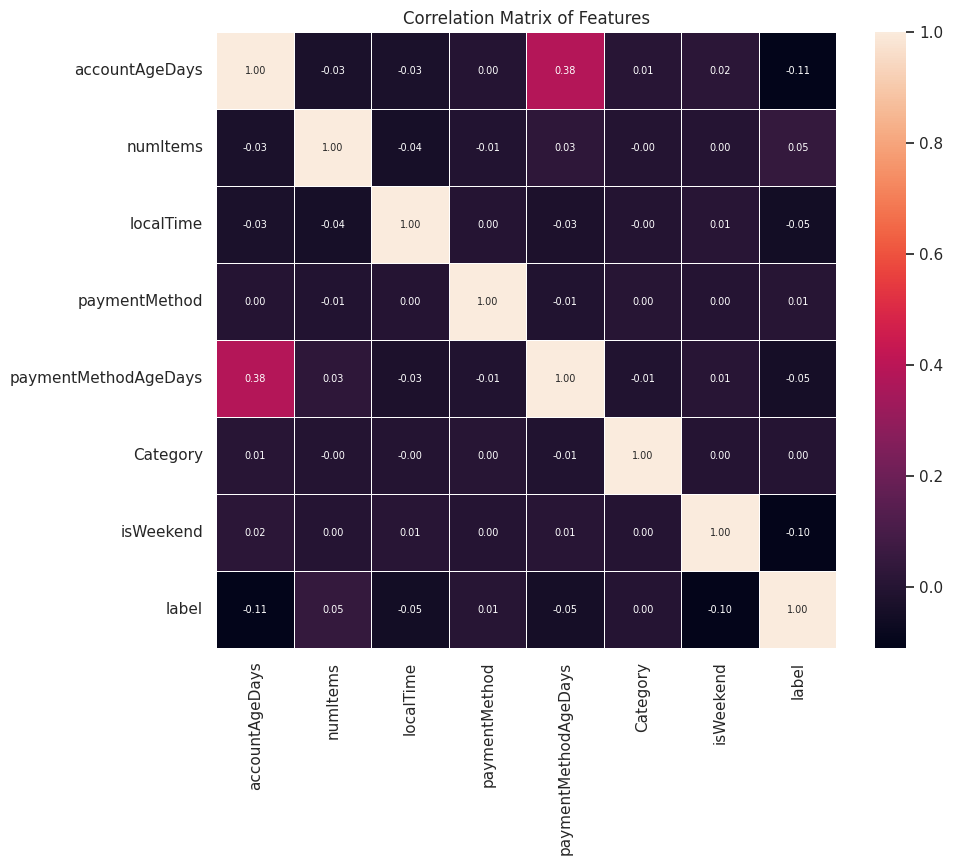

In [33]:
# Plot the Heatmap to visualize correlation Matrix

plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot = True, fmt = '.2f', linewidths=0.5,annot_kws={"size":7})
plt.title("Correlation Matrix of Features")
plt.show()

## Handling Imbalance data set by using SMOTE Techniques
SMOTE - Synthetic Minority Over-Sampling technique


In [34]:
# importing necessary libraries using SMOTE Technique
from imblearn.over_sampling import SMOTE
# Apply SMOTE for oversampling

# intializing SMOTE function
smote = SMOTE(random_state= 42)
X_resampled, y_resampled = smote.fit_resample(X,y)

In [40]:
# Old class distribution
print(f" \nOld Class Distribution:", y.value_counts())
# New class distribution after SMOTE
print(f"\n New Class Distribution:", y_resampled.value_counts())


 
Old Class Distribution: label
0    35792
1      396
Name: count, dtype: int64

 New Class Distribution: label
0    35792
1    35792
Name: count, dtype: int64


## Model Training and Model Evaluation

In [41]:
# importing necessary libraries
from sklearn.model_selection import train_test_split

In [46]:
#splitting the full dataset into the training and testing dataset

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
 # printing the shapes of datasets
print (f"Train data shape: { X_train.shape}")
print(f"Test data shape : {X_test.shape}")


Train data shape: (28950, 7)
Test data shape : (7238, 7)


In [43]:
## Importing necessary libraries

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,roc_auc_score,roc_curve
from sklearn.metrics import f1_score, recall_score,precision_score

 """
    Trains and evaluates multiple classifiers on the given training and test datasets.

    This function takes training and test feature sets and labels, trains three different classifiers
    (Logistic Regression, Decision Tree Classifier, and RandomForestClassifier) on the training data,
    and evaluates their performance on the test data. For each classifier, it prints the confusion matrix,
    classification report, ROC-AUC score, and plots the ROC curve.

    Parameters:
    X_train (pd.DataFrame or np.ndarray): Features of the training data.
    X_test (pd.DataFrame or np.ndarray): Features of the test data.
    y_train (pd.Series or np.ndarray): Labels of the training data.
    y_test (pd.Series or np.ndarray): Labels of the test data.

    Returns:
    None: This function does not return any values but prints evaluation metrics and plots.

    Notes:
    - The function assumes that the test data includes both positive and negative class samples.
    - ROC-AUC scores and ROC curves are only meaningful if the classifier provides probability estimates
      for the positive class.
    - This function will display the ROC curves in separate plots for each classifier.
    """

In [51]:
def train_model(X_train, X_test, y_train, y_test):

    classifier = {
        "Logistic Regression": LogisticRegression(),
        "Decision Tree Classifier": DecisionTreeClassifier(),
        "RandomForestClassifier": RandomForestClassifier(random_state=42)
    }

    for name, model in classifier.items():
        print(f"\n================ {name} ================\n")
        model.fit(X_train, y_train)

        # Make predictions
        y_pred = model.predict(X_test)

        # Confusion matrix
        conf_matrix = confusion_matrix(y_test, y_pred)
        print(f"Confusion Matrix:\n{conf_matrix}\n")

        # Accuracy
        print(f"\nAccuracy: {accuracy_score(y_test, y_pred)}\n")

        # Classification report
        clf_report = classification_report(y_test, y_pred)
        print(f"\nClassification Report:\n{clf_report}\n")

        # ROC-AUC Score
        roc_auc = roc_auc_score(y_test, y_pred)
        print(f"ROC-AUC Score : {roc_auc}\n")

        # Plot ROC Curve
        fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
        plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'ROC Curve\nusing {name}', fontsize=10)
        plt.legend(loc='best')
        plt.show()
        print("\n")


================ Logistic Regression ================

Confusion Matrix:
[[7141    3]
 [  93    1]]


Accuracy: 0.9867366675877314


Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      7144
           1       0.25      0.01      0.02        94

    accuracy                           0.99      7238
   macro avg       0.62      0.51      0.51      7238
weighted avg       0.98      0.99      0.98      7238


ROC-AUC Score : 0.5051091825307952



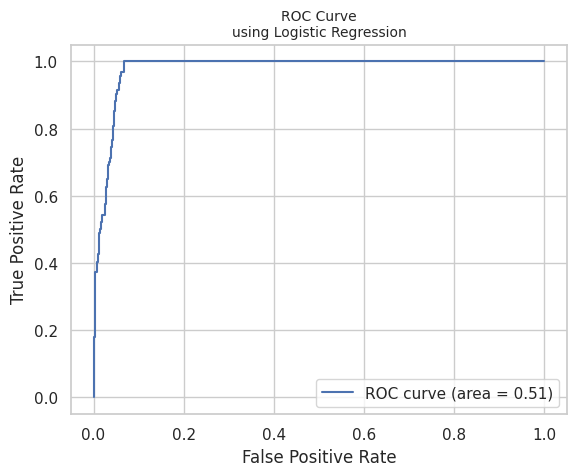




================ Decision Tree Classifier ================

Confusion Matrix:
[[7144    0]
 [   0   94]]


Accuracy: 1.0


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7144
           1       1.00      1.00      1.00        94

    accuracy                           1.00      7238
   macro avg       1.00      1.00      1.00      7238
weighted avg       1.00      1.00      1.00      7238


ROC-AUC Score : 1.0



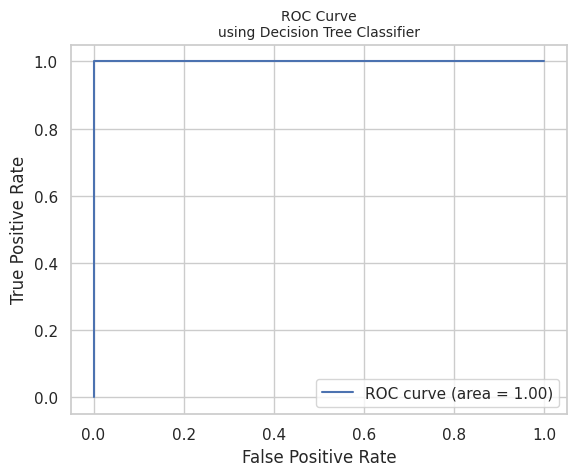




================ RandomForestClassifier ================

Confusion Matrix:
[[7144    0]
 [   0   94]]


Accuracy: 1.0


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7144
           1       1.00      1.00      1.00        94

    accuracy                           1.00      7238
   macro avg       1.00      1.00      1.00      7238
weighted avg       1.00      1.00      1.00      7238


ROC-AUC Score : 1.0



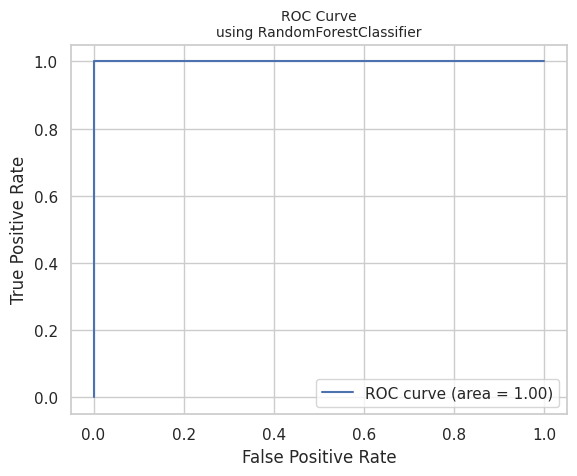

In [52]:
# Call the train_model function
train_model(X_train, X_test, y_train, y_test)

In [53]:
# Picking a model RandomForerst Classifier

model = RandomForestClassifier(random_state =42 )
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [54]:
# Save the model

# importing necessary library
import joblib

In [56]:
# Save the model
joblib.dump(model, "Fraud_Detection_Model.pk1")

['Fraud_Detection_Model.pk1']

In [57]:
# Load the model
model = joblib.load("Fraud_Detection_Model.pk1")

In [63]:
# Predict with a sample data

pred = model.predict([[0.04002380151228437,1,0.4522668195746388,0,-0.4536822596590213,1,1.0]])

# Print the prediction
if pred == 0:
    print("Legitimate Transaction")
else:
    print("Fraud Transaction")

Legitimate Transaction


In [64]:
pred = model.predict([[-1.042878,1,-2.938140,1,-0.453682,2,0.0]])

# Print the prediction
if pred == 0:
    print("Legitimate Transaction")
else:
    print("Fraud Transaction")

Fraud Transaction
